# RGB to Grayscale 
## To convert an RGB image to Grayscale using Parallel code

### Before getting started, download this [this](https://homepages.cae.wisc.edu/~ece533/images/tulips.png) image and upload it to colab.

In [1]:
using Pkg
Pkg.add("CuArrays")
Pkg.add("CUDAnative")
Pkg.add("CUDAdrv")
Pkg.add("StaticArrays")
Pkg.add("BenchmarkTools")
Pkg.add("Test")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed DataStructures ─ v0.17.0
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [864edb3b] ↑ DataStructures v0.15.0 ⇒ v0.17.0
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifes

In [0]:
using CUDAnative, CUDAdrv, CuArrays, StaticArrays, BenchmarkTools, Test

In [0]:
import Pkg
Pkg.add("Images")
Pkg.add("TestImages")
Pkg.add("Colors")
Pkg.add("FileIO")
Pkg.add("ImageMagick")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [3]:
using Images, Colors, FileIO, Test

┌ Info: Recompiling stale cache file /root/.julia/compiled/v1.0/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1184


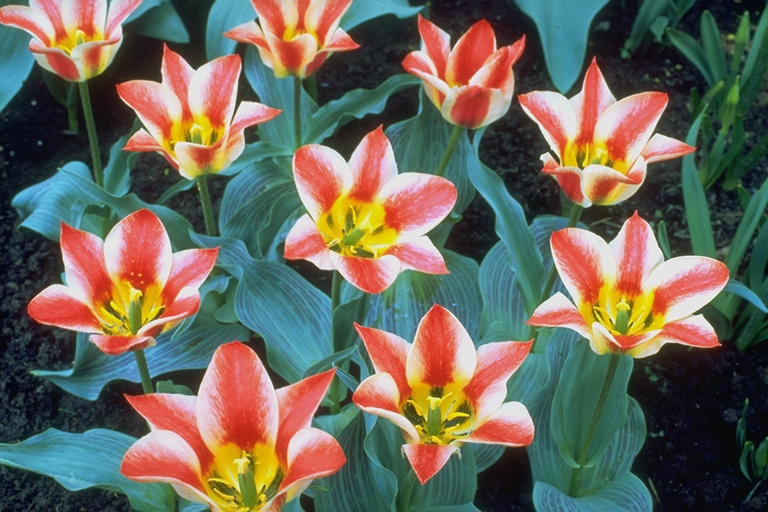

In [4]:
# Upload image
# Will be gone in 12 hrs. Must be reuploaded 
Img = load("/content/tulips.png")

In [6]:
# Details regarding image
summary(Img)

"512×768 Array{RGB{N0f8},2} with eltype RGB{Normed{UInt8,8}}"

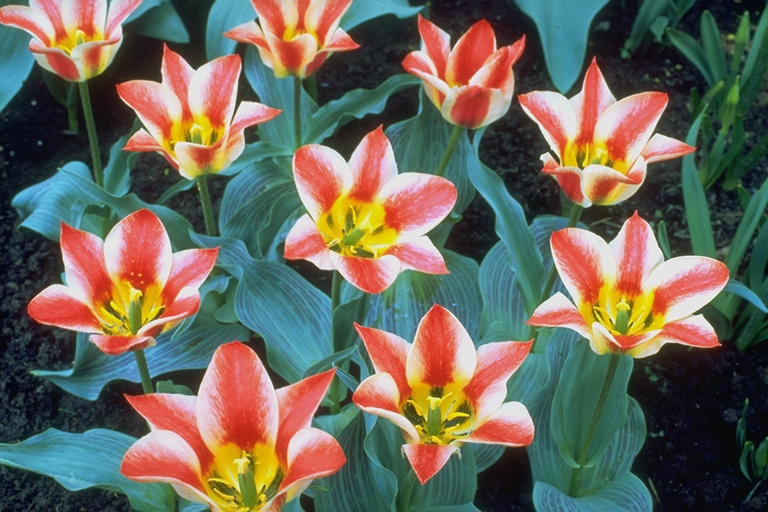

In [7]:
# Converting to RGB{Float32} datatype
RGB_image = convert(Array{RGB{Float32},2},Img)

In [8]:
const height = size(RGB_image,1)
const breadth = size(RGB_image,2)

768

In [9]:
function RGB_to_Gray(d_output,d_red,d_green,d_blue)
  idx = (blockIdx().x - 1) * blockDim().x + threadIdx().x
  idy = (blockIdx().y - 1) * blockDim().y + threadIdx().y
  
  # Bounds check
  if(idx <= height && idy <= breadth)
    d_output[idx,idy] = 0.21 * d_red[idx,idy] + 0.71 * d_green[idx,idy] + 0.07 * d_blue[idx,idy]
  end
  
  return nothing
end

RGB_to_Gray (generic function with 1 method)

In [10]:
FltGray_image = rand(Float32,height,breadth)

512×768 Array{Float32,2}:
 0.660193    0.423819  0.409764   …  0.0201985   0.770828   0.595588  
 0.95611     0.624715  0.076144      0.41919     0.0202278  0.67411   
 0.204141    0.790861  0.144614      0.692531    0.626477   0.872684  
 0.846279    0.610028  0.337097      0.984518    0.757477   0.966037  
 0.45185     0.928486  0.0287347     0.00113225  0.630936   0.291718  
 0.851621    0.104892  0.527918   …  0.628279    0.121565   0.00419164
 0.0449903   0.935933  0.108766      0.999277    0.325854   0.476596  
 0.686617    0.224389  0.239874      0.334131    0.524087   0.591935  
 0.178006    0.139768  0.515216      0.37102     0.853329   0.886837  
 0.00735819  0.922059  0.699207      0.444873    0.0203732  0.720568  
 0.673188    0.754683  0.993789   …  0.32076     0.207812   0.581282  
 0.230832    0.793095  0.964715      0.748396    0.543503   0.560538  
 0.0528765   0.523721  0.16886       0.495813    0.618774   0.317769  
 ⋮                                ⋱  ⋮             

In [11]:
# Channelized view of RGB image
ChannelRGB_image = channelview(RGB_image)

3×512×768 reinterpret(Float32, ::Array{RGB{Float32},3}):
[:, :, 1] =
 0.211765  0.176471  0.192157  0.188235  …  0.219608  0.215686  0.152941
 0.396078  0.337255  0.333333  0.317647     0.290196  0.282353  0.223529
 0.32549   0.266667  0.262745  0.258824     0.305882  0.294118  0.239216

[:, :, 2] =
 0.192157  0.184314  0.2       0.211765  …  0.160784  0.113725  0.054902
 0.356863  0.333333  0.32549   0.333333     0.211765  0.160784  0.117647
 0.294118  0.27451   0.266667  0.278431     0.243137  0.192157  0.141176

[:, :, 3] =
 0.180392  0.192157  0.2       0.211765  …  0.12549   0.0235294  0.0      
 0.32549   0.329412  0.32549   0.333333     0.168627  0.0470588  0.0588235
 0.270588  0.27451   0.266667  0.278431     0.203922  0.0941177  0.0745098

...

[:, :, 766] =
 0.0313726  0.0235294  0.0196078  …  0.027451   0.0313726  0.027451 
 0.145098   0.113725   0.0980392     0.0313726  0.0352941  0.0352941
 0.137255   0.109804   0.0980392     0.0627451  0.0745098  0.0509804

[:, :, 767] =


In [12]:
# Conversion to Float32 type
FltRGB_image = convert(Array{Float32},ChannelRGB_image)

3×512×768 Array{Float32,3}:
[:, :, 1] =
 0.211765  0.176471  0.192157  0.188235  …  0.219608  0.215686  0.152941
 0.396078  0.337255  0.333333  0.317647     0.290196  0.282353  0.223529
 0.32549   0.266667  0.262745  0.258824     0.305882  0.294118  0.239216

[:, :, 2] =
 0.192157  0.184314  0.2       0.211765  …  0.160784  0.113725  0.054902
 0.356863  0.333333  0.32549   0.333333     0.211765  0.160784  0.117647
 0.294118  0.27451   0.266667  0.278431     0.243137  0.192157  0.141176

[:, :, 3] =
 0.180392  0.192157  0.2       0.211765  …  0.12549   0.0235294  0.0      
 0.32549   0.329412  0.32549   0.333333     0.168627  0.0470588  0.0588235
 0.270588  0.27451   0.266667  0.278431     0.203922  0.0941177  0.0745098

...

[:, :, 766] =
 0.0313726  0.0235294  0.0196078  …  0.027451   0.0313726  0.027451 
 0.145098   0.113725   0.0980392     0.0313726  0.0352941  0.0352941
 0.137255   0.109804   0.0980392     0.0627451  0.0745098  0.0509804

[:, :, 767] =
 0.0313726  0.0313726  0.0313

In [13]:
# Allocating and copying memory from host to device

d_red = CuArray(FltRGB_image[:1,:,:])
d_green = CuArray(FltRGB_image[:2,:,:])
d_blue = CuArray(FltRGB_image[:3,:,:])
d_output = CuArray(FltGray_image)

512×768 CuArray{Float32,2}:
 0.660193    0.423819  0.409764   …  0.0201985   0.770828   0.595588  
 0.95611     0.624715  0.076144      0.41919     0.0202278  0.67411   
 0.204141    0.790861  0.144614      0.692531    0.626477   0.872684  
 0.846279    0.610028  0.337097      0.984518    0.757477   0.966037  
 0.45185     0.928486  0.0287347     0.00113225  0.630936   0.291718  
 0.851621    0.104892  0.527918   …  0.628279    0.121565   0.00419164
 0.0449903   0.935933  0.108766      0.999277    0.325854   0.476596  
 0.686617    0.224389  0.239874      0.334131    0.524087   0.591935  
 0.178006    0.139768  0.515216      0.37102     0.853329   0.886837  
 0.00735819  0.922059  0.699207      0.444873    0.0203732  0.720568  
 0.673188    0.754683  0.993789   …  0.32076     0.207812   0.581282  
 0.230832    0.793095  0.964715      0.748396    0.543503   0.560538  
 0.0528765   0.523721  0.16886       0.495813    0.618774   0.317769  
 ⋮                                ⋱  ⋮           

In [14]:
# Kernel call
@cuda blocks = (Int(ceil(height/32)),Int(ceil(breadth/32))) threads = (32,32) RGB_to_Gray(d_output,d_red,d_green,d_blue)

┌ Info: Building the CUDAnative run-time library for your sm_70 device, this might take a while...
└ @ CUDAnative /root/.julia/packages/CUDAnative/gJDZI/src/compiler/rtlib.jl:154


In [15]:
# Copying back from device to host
h_output = Array(d_output)

512×768 Array{Float32,2}:
 0.348471  0.314314  0.287922   0.282078   …  0.119216   0.141765   0.161176 
 0.295176  0.294588  0.293451   0.284824      0.0933726  0.135647   0.180275 
 0.295412  0.291765  0.291765   0.291765      0.0805882  0.135647   0.214118 
 0.283176  0.300627  0.300627   0.29949       0.0811765  0.168118   0.270157 
 0.300627  0.29949   0.305608   0.303922      0.103686   0.197843   0.295725 
 0.31302   0.301608  0.29549    0.304902   …  0.131451   0.233373   0.320431 
 0.305216  0.322902  0.374706   0.476431      0.165608   0.284431   0.356824 
 0.371882  0.488     0.615255   0.693451      0.233882   0.33051    0.370157 
 0.563333  0.655373  0.70498    0.673098      0.277176   0.360235   0.387686 
 0.624157  0.623333  0.638314   0.643608      0.324667   0.383843   0.39051  
 0.56298   0.567177  0.601882   0.639373   …  0.368549   0.403294   0.410784 
 0.505137  0.523765  0.592078   0.648157      0.402667   0.421059   0.409412 
 0.466745  0.48902   0.571765   0.6813

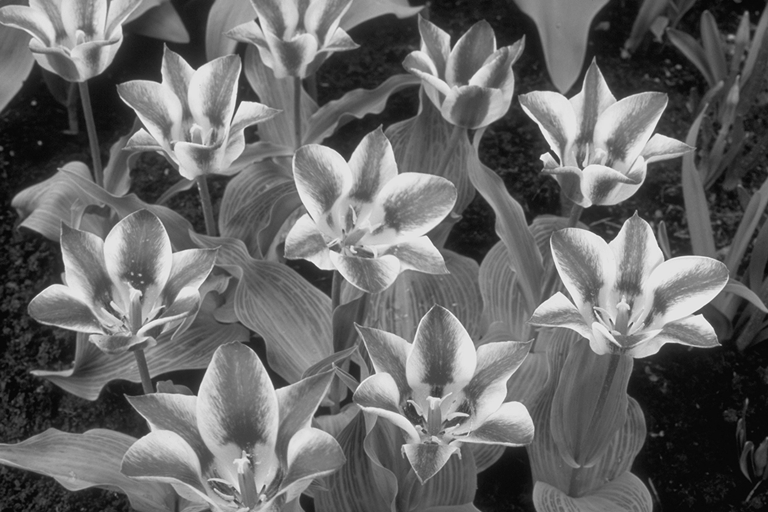

In [16]:
# Typecast to Gray{Float32} type
Grayscale_image = Gray{Float32}.(h_output)